In [ ]:
import pandas as pd
from load_data import load_data
from convolutional_NN import train_classifier
from functional_square_loss import functional_square_loss
from plotnine import ggplot, geom_line, aes, labs
from functional_square_hinge_loss import functional_square_hinge_loss
from naive_square_loss import naive_square_loss
from naive_square_hinge_loss import naive_square_hinge_loss
import time
import numpy as np

SEED = 123
imratio = 0.5
lr = .5e-06
num_epochs = 10
algo_list = [functional_square_loss, functional_square_hinge_loss, naive_square_hinge_loss, naive_square_loss]
str_algo_list = ['functional_square_loss', 'functional_square_hinge_loss', 'naive_square_hinge_loss', 'naive_square_loss']
times = pd.DataFrame(0, index=np.arange(num_epochs), columns= str_algo_list)
trainloader, testloader = load_data(SEED, imratio)
for x in range(4):
    print(x)
    for i in range(num_epochs):
        start = time.time()
        train_results = train_classifier(trainloader, testloader, algo_list[x], num_epochs, lr)
        end = time.time()
        times.at[i, str_algo_list[x]] = end - start
times

In [ ]:
import numpy as np
idx = np.arange(0,25)
full_dict = dict(zip(idx,train_results))
train_results_df = pd.DataFrame(full_dict[0], index=[0])
for num_epochs in range(1,25):
    temp = pd.DataFrame(full_dict[num_epochs], index=[0])
    combine = [train_results_df, temp]
    train_results_df = pd.concat(combine)
train_results_df

In [ ]:
import pandas as pd
times = pd.read_csv('/home/kyle/Documents/sub-quadratic-full-gradient-AUC-optimization/times.csv')
times_augmented = np.array(times.index)


In [ ]:
import matplotlib.pyplot as plt
idx = np.array(times.index)
plt.plot(idx,times['functional_square_loss']*idx,'r',
         idx,times['functional_square_hinge_loss']*idx,'b',
         idx,times['naive_square_hinge_loss']*idx,'g',
         idx,times['naive_square_loss']*idx,'k')
plt.legend(times.columns)
plt.ylabel('Time (s)')
plt.xlabel("Number of Epochs")
plt.title("Algorithm Timings vs Number of Epochs")
# plt.show()
plt.savefig('../figures/TimeVsEpochs.png',transparent=False)

In [ ]:
df = pd.DataFrame(columns=['functional_square_loss', 'functional_square_hinge_loss', 'naive_square_hinge_loss', 'naive_square_loss'])
df.append({'functional_square_loss': 10}, ignore_index=True)

In [1]:
import pandas as pd
from load_data import load_data
from convolutional_NN import train_classifier
from functional_square_loss import functional_square_loss
from plotnine import ggplot, geom_line, aes, labs
from functional_square_hinge_loss import functional_square_hinge_loss
from naive_square_loss import naive_square_loss
from naive_square_hinge_loss import naive_square_hinge_loss
import time
import numpy as np

2021-09-27 10:52:47.123290: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-27 10:52:47.123314: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
SEED = 123
imratio = 0.5
lr = .5e-06
num_epochs = 2
# time_limits = np.array(range(5,30,5))
log_time = np.logspace(.01,1.5,5)
algo_list = [functional_square_loss, functional_square_hinge_loss, naive_square_hinge_loss, naive_square_loss]
str_algo_list = ['functional_square_loss', 'functional_square_hinge_loss', 'naive_square_hinge_loss', 'naive_square_loss']
counts = pd.DataFrame(0, index=np.arange(3), columns= str_algo_list)
trainloader, testloader = load_data(SEED, imratio)
for x in range(4):
    print(x)
    for i in range(5):
        print(log_time[i])
        count = train_classifier(trainloader, testloader, algo_list[x], num_epochs, lr, log_time[i])
        counts.at[i, str_algo_list[x]] = count
counts

NUM_SAMPLES: [50000], POS:NEG: [25000 : 25000], POS_RATIO: 0.5000
NUM_SAMPLES: [10000], POS:NEG: [5000 : 5000], POS_RATIO: 0.5000
0
1.023292992280754
2.4126815325916335
5.688529308438414
13.41219935405371
31.622776601683793
1
1.023292992280754
2.4126815325916335
5.688529308438414
13.41219935405371
31.622776601683793
2
1.023292992280754
2.4126815325916335
5.688529308438414
13.41219935405371
31.622776601683793
3
1.023292992280754
2.4126815325916335
5.688529308438414
13.41219935405371
31.622776601683793


,functional_square_loss,functional_square_hinge_loss,naive_square_hinge_loss,naive_square_loss
0,1160.0,340.0,260.0,240.0
1,1700.0,500.0,380.0,360.0
2,3540.0,1040.0,760.0,740.0
3,8360.0,2420.0,1800.0,1720.0
4,18680.0,5380.0,3960.0,3460.0


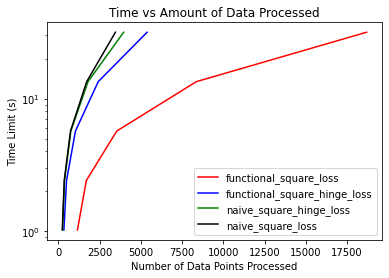

In [6]:
import matplotlib.pyplot as plt
idx = log_time
plt.plot(counts['functional_square_loss'],idx,'r',
         counts['functional_square_hinge_loss'],idx,'b',
         counts['naive_square_hinge_loss'],idx,'g',
         counts['naive_square_loss'],idx,'k')
plt.legend(counts.columns)
plt.ylabel('Time Limit (s)')
plt.xlabel("Number of Data Points Processed")
plt.title("Time vs Amount of Data Processed")
plt.yscale("log")
# plt.show()
plt.savefig('../figures/DataVsTimeLog.png',transparent=False)